# Multiple Linear Regression with Feature Selection

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
%matplotlib inline

In [51]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [52]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [53]:
df.drop(columns = ['origin', 'name'], inplace = True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [55]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [56]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64

In [57]:
df.horsepower.dropna(inplace = True)
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64

In [58]:
x = df.iloc[:, 1:]
y = df.mpg

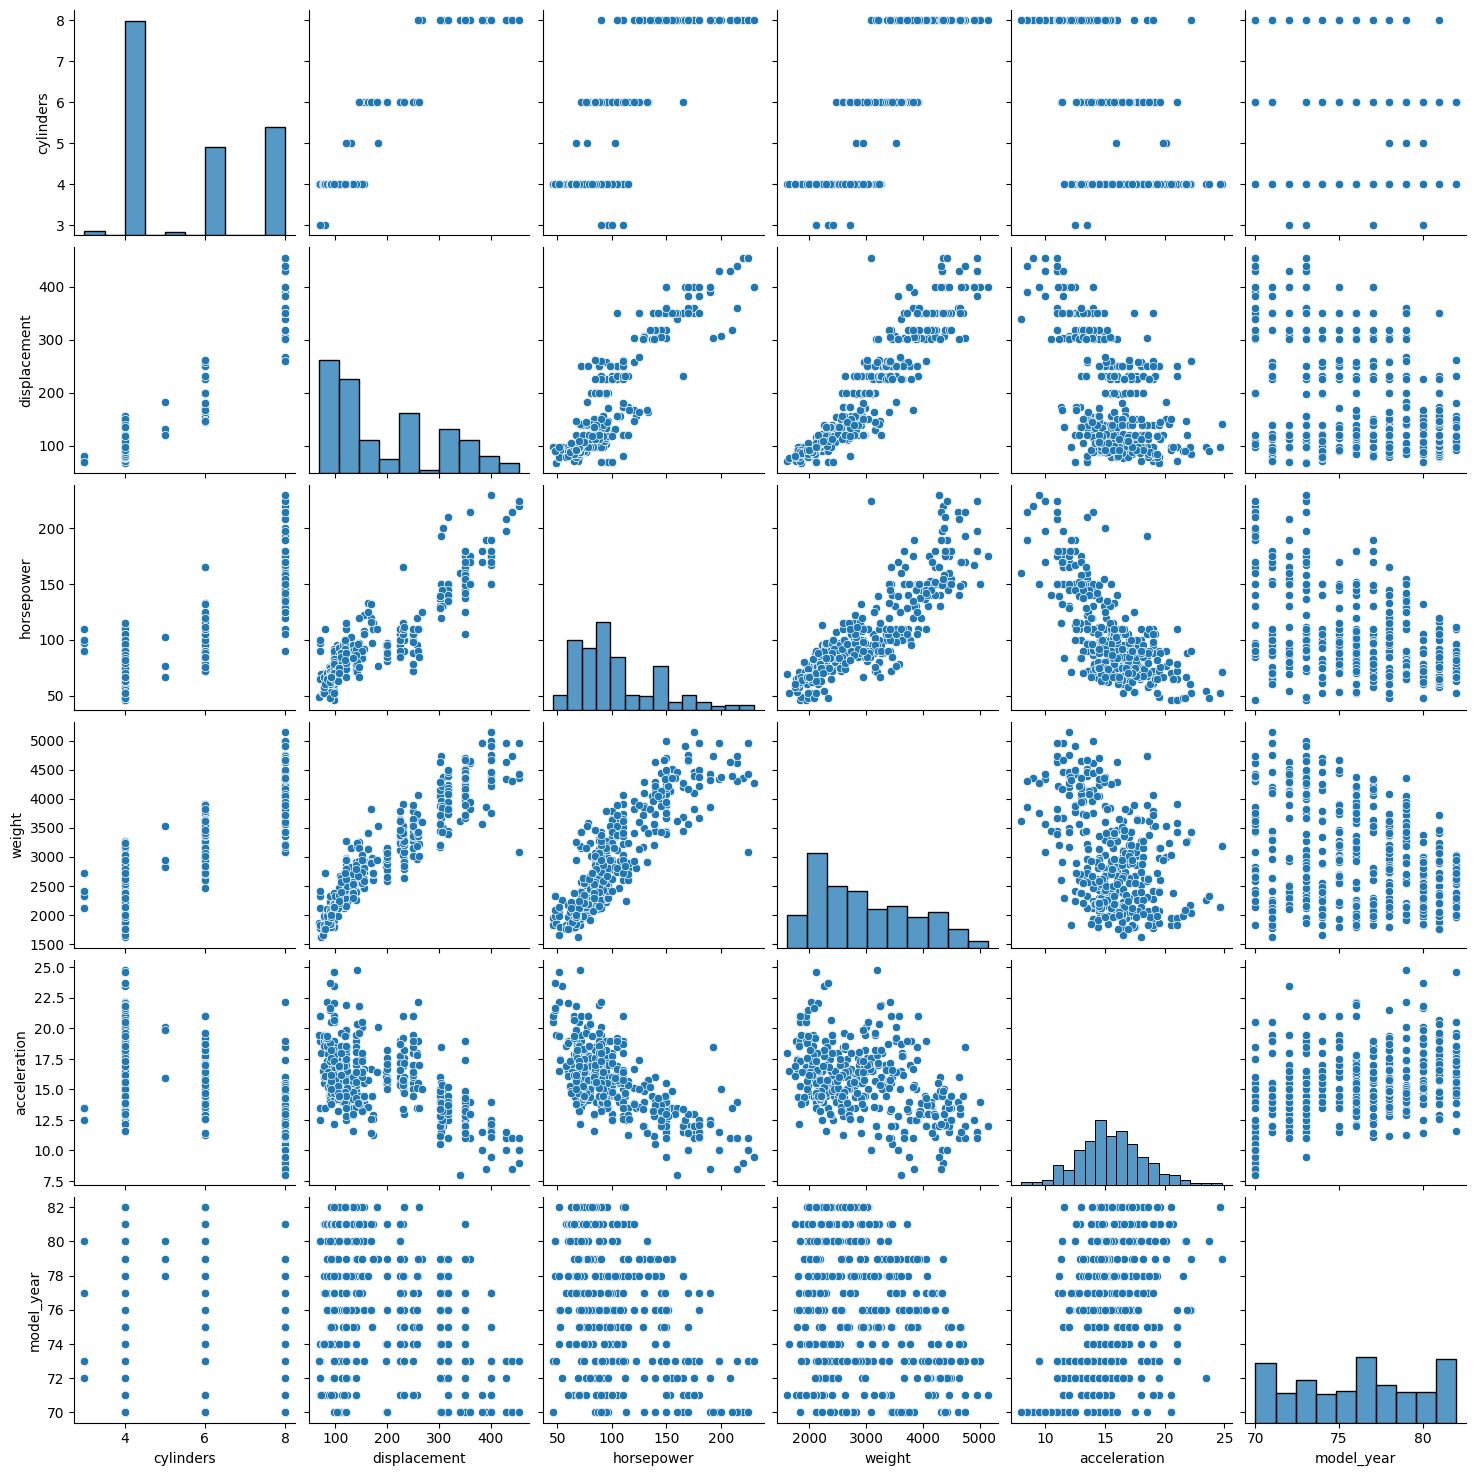

In [59]:
sns.pairplot(x)

In [60]:
x.corr()

,cylinders,displacement,horsepower,weight,acceleration,model_year
cylinders,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


<Axes: >

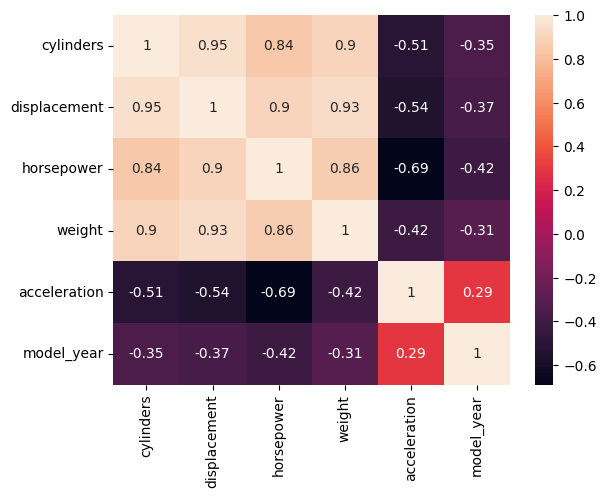

In [61]:
sns.heatmap(x.corr(), annot = True)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [70]:
y_train

245    36.1
110    22.0
16     18.0
66     17.0
153    18.0
       ... 
71     19.0
106    12.0
270    21.1
348    37.7
102    26.0
Name: mpg, Length: 298, dtype: float64

In [72]:
from sklearn.linear_model import ElasticNet

In [73]:
elas = ElasticNet()

In [74]:
elas.fit(x_train, y_train)

ValueError: Input X contains NaN.
ElasticNet does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [76]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Load California housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the Lasso model with an alpha value for regularization
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso.fit(X_scaled, y)

# Get coefficients
coef = lasso.coef_

# Display features selected by Lasso
selected_features = X.columns[coef != 0]
dropped_features = X.columns[coef == 0]

print("Selected Features:", list(selected_features))
print("Dropped Features:", list(dropped_features))


Selected Features: ['MedInc', 'HouseAge', 'Latitude']
Dropped Features: ['AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Longitude']
